In [ ]:
!pip install ultralytics -q
import os
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

print("✅ Setup Complete.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Setup Complete.


In [ ]:
from google.colab import drive

# This connects your Google Drive to the Colab machine
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


🧠 Loading /content/drive/MyDrive/Ideathon/TRAINED_MODEL/best.pt...
📸 Running prediction on test1.jpg...

image 1/1 /content/test1.jpg: 640x640 10 solar_panels, 93.7ms
Speed: 2.0ms preprocess, 93.7ms inference, 14.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/segment/predict


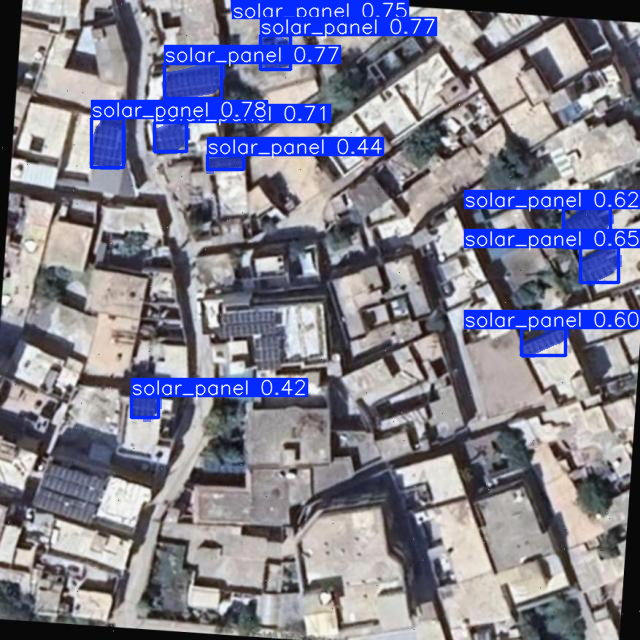

✅ Done! Do you see the polygons?


In [ ]:

MODEL_FILE = '/content/drive/MyDrive/Ideathon/TRAINED_MODEL/best.pt'
IMAGE_FILE = 'test1.jpg'

if os.path.exists(MODEL_FILE) and os.path.exists(IMAGE_FILE):
    print(f"🧠 Loading {MODEL_FILE}...")
    model = YOLO(MODEL_FILE)

    print(f"📸 Running prediction on {IMAGE_FILE}...")
    # Run prediction
    results = model.predict(IMAGE_FILE, save=True, conf=0.25)

    # Display the result
    # Plot() returns a numpy array (BGR), we convert to RGB for display
    annotated_img = results[0].plot()
    display(Image.fromarray(annotated_img[..., ::-1]))

    print("✅ Done! Do you see the polygons?")
else:
    print("❌ Error: Please check that you uploaded 'best.pt' and your image!")

🧠 Loading /content/drive/MyDrive/Ideathon/TRAINED_MODEL/best.pt...
📸 Running prediction on test1.jpg...

image 1/1 /content/test1.jpg: 640x640 10 solar_panels, 120.9ms
Speed: 7.8ms preprocess, 120.9ms inference, 32.5ms postprocess per image at shape (1, 3, 640, 640)
✅ Found 10 panels! Drawing them in Green.


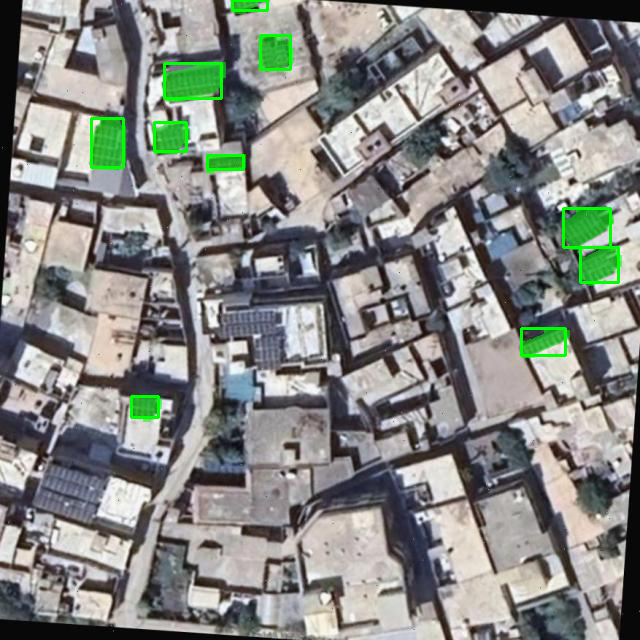

In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

MODEL_FILE = '/content/drive/MyDrive/Ideathon/TRAINED_MODEL/best.pt'
IMAGE_FILE = 'test1.jpg'

# --- CONFIGURATION ---
MASK_COLOR = (0, 255, 0)  # Green in (B, G, R) format
ALPHA = 0.5               # Transparency (0.0 = invisible, 1.0 = solid)

if os.path.exists(MODEL_FILE) and os.path.exists(IMAGE_FILE):
    print(f"🧠 Loading {MODEL_FILE}...")
    model = YOLO(MODEL_FILE)

    print(f"📸 Running prediction on {IMAGE_FILE}...")
    # Run prediction
    results = model.predict(IMAGE_FILE, conf=0.25)
    result = results[0] # Get first result

    # 1. Get the original image (OpenCV format: BGR)
    img = result.orig_img.copy()

    # 2. Check if we found any masks
    if result.masks is not None:
        # Create a copy for the overlay (to handle transparency)
        overlay = img.copy()

        # Get all mask polygons
        # xy is a list of arrays, where each array is the polygon points for one object
        polygons = result.masks.xy

        # 3. Draw every polygon in GREEN
        for poly in polygons:
            # Convert float points to integer points
            int_poly = np.array(poly, dtype=np.int32)

            # Fill the polygon with Green
            cv2.fillPoly(overlay, [int_poly], color=MASK_COLOR)

        # 4. Blend the overlay with the original image (Transparency)
        # formula: img = alpha * overlay + (1 - alpha) * img
        cv2.addWeighted(overlay, ALPHA, img, 1 - ALPHA, 0, img)

        # 5. Optional: Draw bounding boxes as well (if you want them)
        # If you only want masks, you can skip this loop
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            # Draw simple rectangle
            cv2.rectangle(img, (x1, y1), (x2, y2), MASK_COLOR, 2)

        print(f"✅ Found {len(polygons)} panels! Drawing them in Green.")
    else:
        print("⚠️ No solar panels detected.")

    # 6. Display
    # Convert BGR (OpenCV) to RGB (PIL) for correct color display in Notebook
    display(Image.fromarray(img[..., ::-1]))

else:
    print("❌ Error: Please check that you uploaded 'best.pt' and your image!")

In [ ]:
!unzip "/content/drive/MyDrive/Ideathon/solar_dataset.zip" -d /content/dataset

Streaming output truncated to the last 5000 lines.
 extracting: /content/dataset/train/labels/z18_x183085_y104719_png.rf.a6766219552f935f2d480e40058700e7.txt  
 extracting: /content/dataset/train/labels/z18_x183085_y104719_png.rf.c1b30a7110dd0614aef0e063fbb9b4d8.txt  
 extracting: /content/dataset/train/labels/z18_x183085_y104720_png.rf.93914693fb549af4f1b25243045df358.txt  
 extracting: /content/dataset/train/labels/z18_x183085_y104721_png.rf.4b9ce365adfa7763a9de1571bad9a8df.txt  
 extracting: /content/dataset/train/labels/z18_x183085_y104721_png.rf.808039ad495f055be76b6226a729588f.txt  
 extracting: /content/dataset/train/labels/z18_x183085_y104721_png.rf.843b903a4f07353b4b0a4d170ced2f4c.txt  
 extracting: /content/dataset/train/labels/z18_x183085_y104721_png.rf.8e65e9f7630a803e446600cc8b378e85.txt  
 extracting: /content/dataset/train/labels/z18_x183085_y104721_png.rf.bda74eb12196b08f943ce2799b4cbe76.txt  
 extracting: /content/dataset/train/labels/z18_x183085_y104721_png.rf.c2e8531

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/Ideathon/TRAINED_MODEL/best.pt")

print("📊 Starting Validation on Test Set...")
metrics = model.val(data="dataset/data.yaml", split="test")

print(f"🎯 mAP50 (Accuracy): {metrics.seg.map50}")
print(f"🎯 mAP50-95 (Strict Accuracy): {metrics.seg.map}")

📊 Starting Validation on Test Set...
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x-seg summary (fused): 203 layers, 62,003,283 parameters, 0 gradients, 295.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1898.0±915.4 MB/s, size: 61.5 KB)
val: Scanning /content/dataset/test/labels... 967 images, 600 backgrounds, 151 corrupt: 100% ━━━━━━━━━━━━ 967/967 2.7Kit/s 0.4s
val: /content/dataset/test/images/sp0068_png.rf.db6ec3e12f3a301195c5c5752c17da69.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/dataset/test/images/sp0069_png.rf.5fedf829a94084fb12916a02c00cd2d1.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/dataset/test/images/sp0070_png.rf.5da2d086d53c44b4b665410706d1e382.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: 

In [ ]:
import cv2
from ultralytics import YOLO

# 1. SETUP
MODEL_PATH = r"best.pt"  # Your trained model
IMAGE_PATH = r"test1.jpg"                           # The image you just tested
GSD = 0.1                                           # REPLACE with your calculated scale (meters per pixel)

# 2. RUN INFERENCE
model = YOLO(MODEL_PATH)
results = model.predict(IMAGE_PATH, conf=0.25)

# 3. CALCULATE AREA
total_area = 0
panel_count = 0

if results[0].masks is not None:
    # Get all polygons (masks) found
    for mask in results[0].masks.xy:

        # Calculate pixel area using OpenCV's geometry function
        # (This is much better than just counting dots)
        pixel_area = cv2.contourArea(mask)

        # Convert to Real World Area
        real_area = pixel_area * (GSD ** 2)

        total_area += real_area
        panel_count += 1

        print(f"Panel {panel_count}: {real_area:.2f} m² (Pixels: {pixel_area:.0f})")

print("-" * 30)
print(f"✅ Total Solar Area: {total_area:.2f} m²")
print(f"⚡ Est. Capacity: {total_area * 0.200:.2f} kW") # Assuming 200W per sqm


image 1/1 /content/test1.jpg: 640x640 16 solar_panels, 60.9ms
Speed: 1.9ms preprocess, 60.9ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 640)
Panel 1: 17.27 m² (Pixels: 1727)
Panel 2: 8.60 m² (Pixels: 860)
Panel 3: 6.73 m² (Pixels: 673)
Panel 4: 10.14 m² (Pixels: 1014)
Panel 5: 13.43 m² (Pixels: 1343)
Panel 6: 14.95 m² (Pixels: 1494)
Panel 7: 8.82 m² (Pixels: 882)
Panel 8: 2.38 m² (Pixels: 238)
Panel 9: 5.83 m² (Pixels: 582)
Panel 10: 13.65 m² (Pixels: 1364)
Panel 11: 10.25 m² (Pixels: 1025)
Panel 12: 4.47 m² (Pixels: 447)
Panel 13: 16.82 m² (Pixels: 1682)
Panel 14: 14.81 m² (Pixels: 1480)
Panel 15: 11.49 m² (Pixels: 1148)
Panel 16: 2.88 m² (Pixels: 288)
------------------------------
✅ Total Solar Area: 162.48 m²
⚡ Est. Capacity: 32.50 kW


In [ ]:
!pip install ultralytics shapely -q

import cv2
import numpy as np
import math
from shapely.geometry import Polygon, Point
from ultralytics import YOLO


def calculate_radius_from_sqft(area_sqft):
    """Converts Area (sq.ft) -> Radius (meters)."""
    # 1 sq ft = 0.092903 sq meters
    area_sqm = area_sqft * 0.092903
    # Area = pi * r^2  -->  r = sqrt(Area / pi)
    radius_meters = math.sqrt(area_sqm / math.pi)
    return radius_meters

def get_best_panel(buffer_circle, panels, gsd):
    """
    Finds the panel with the largest overlap inside the buffer circle.
    Returns: (best_panel_polygon, total_area_sqm) or (None, 0)
    """
    max_overlap_area = 0
    best_panel = None

    for panel in panels:
        # Calculate intersection (Green Area in your diagram)
        intersection = buffer_circle.intersection(panel)
        overlap_area = intersection.area

        # We want the panel with the LARGEST overlapping area
        if overlap_area > max_overlap_area:
            max_overlap_area = overlap_area
            best_panel = panel

    if best_panel:
        # Start "Quantify" Logic: Return the TOTAL area of the chosen panel
        # Total Area = Polygon Area (pixels) * GSD^2
        total_area_pixels = best_panel.area
        total_area_sqm = total_area_pixels * (gsd ** 2)
        return best_panel, total_area_sqm

    return None, 0

def process_site_logic(image, results, gsd=0.15):
    """
    Implements the 2-step Buffer Logic:
    1. Check 1200 sq.ft buffer.
    2. If fails, check 2400 sq.ft buffer.
    """
    h, w = image.shape[:2]
    center_point = Point(w / 2, h / 2) # Assuming (lat, lon) is the image center

    # 1. Extract all detected Solar Panels as Polygons
    detected_panels = []
    if results[0].masks is not None:
        for mask_contour in results[0].masks.xy:
            if len(mask_contour) >= 3: # Need at least 3 points for a polygon
                detected_panels.append(Polygon(mask_contour))

    # --- STEP 1: CHECK 1200 SQ. FT BUFFER ---
    radius_1200_m = calculate_radius_from_sqft(1200)
    radius_1200_px = radius_1200_m / gsd
    buffer_1200 = center_point.buffer(radius_1200_px)

    best_panel, area = get_best_panel(buffer_1200, detected_panels, gsd)

    if best_panel:
        return {
            "has_solar": True,
            "buffer_radius_sqft": 1200,
            "pv_area_sqm_est": round(area, 2),
            "capacity_kw": round(area * 0.200, 2), # Approx 200W per sqm
            "qc_status": "VERIFIABLE"
        }

    # --- STEP 2: CHECK 2400 SQ. FT BUFFER ---
    radius_2400_m = calculate_radius_from_sqft(2400)
    radius_2400_px = radius_2400_m / gsd
    buffer_2400 = center_point.buffer(radius_2400_px)

    best_panel, area = get_best_panel(buffer_2400, detected_panels, gsd)

    if best_panel:
        return {
            "has_solar": True,
            "buffer_radius_sqft": 2400,
            "pv_area_sqm_est": round(area, 2),
            "capacity_kw": round(area * 0.200, 2),
            "qc_status": "VERIFIABLE"
        }

    # --- STEP 3: NO PANELS FOUND ---
    return {
        "has_solar": False,
        "buffer_radius_sqft": 2400,
        "pv_area_sqm_est": 0,
        "capacity_kw": 0,
        "qc_status": "VERIFIABLE" # Or NOT_VERIFIABLE depending on cloud check
    }

# ==========================================
# 3. RUN ON A TEST IMAGE
# ==========================================
# Load your trained model
model = YOLO('best.pt')  # Update path if needed

# Load an image (Replace with your test image path)
test_image_path = "HouseLowAngle.jpeg" # <--- UPDATE THIS
image = cv2.imread(test_image_path)

if image is not None:
    # Run Inference
    results = model.predict(image, conf=0.25)

    # Run the Logic
    # GSD = 0.1 meters/pixel (Update this based on your zoom level)
    final_output = process_site_logic(image, results, gsd=0.1)

    print("\n✅ FINAL JSON OUTPUT:")
    print(final_output)
else:
    print("❌ Error: Test image not found.")


0: 480x640 12 solar_panels, 136.1ms
Speed: 21.7ms preprocess, 136.1ms inference, 30.3ms postprocess per image at shape (1, 3, 480, 640)

✅ FINAL JSON OUTPUT:
{'has_solar': True, 'buffer_radius_sqft': 1200, 'pv_area_sqm_est': 61.67, 'capacity_kw': 12.33, 'qc_status': 'VERIFIABLE'}
